
<h1>Text Classification using Transformer Hugging Face(Notebook)</h1>

This classification dataset of various students of the support@ineuron.in portal. This portal provides real-time solutions to queries regarding machine learning, deep learning, and many other technical stacks, asked by their enrolled students or some general queries by unregistered users. The dataset has millions of queries with respective solutions from the last few years.


The key feature of this dataset is, it has various types of intents in ML, DL, NLP, and various fields of data science which could be used for model training approach using transformer architecture to make a classification in queries dataset based on various intents, which can enhance their support system.


In [1]:
from google.colab import drive #mounting drve for file uploading
drive.mount('/content/data/')

Mounted at /content/data/


In [2]:
#function for merging all the files
def merge_data(files):
  final_frame = pd.concat([pd.read_excel(file) for file in files],ignore_index=True)
  return final_frame

In [3]:
import pandas as pd
import glob
import os

dataset_folder = glob.glob(r"/content/data/My Drive/final_data" + "/*.xlsx")    # extracting all files path from dataset folder
          

In [4]:
dataset = merge_data(dataset_folder)

<h1>Multiclass Text Classification Dataset</h1>

In [5]:
dataset

,Unnamed: 0,id,displayName,content,originalarrivaltime,Intent,Slots,Unnamed: 6
0,4821.0,1.590382e+12,Jagadeesh Vallurupalli,"Hi Team, Good Morning !! Is there any possibil...",2020-05-25T04:54:19.888Z,zoom_link_query,NaN,NaN
1,6499.0,1.591499e+12,Sai Charith Daggupati,I could see the zoom link only!! Please help m...,2020-06-07T03:07:17.489Z,zoom_link_query,NaN,NaN
2,7442.0,1.587978e+12,Rutu Mandhani,Is there any zoom invite link to join the call,2020-04-27T09:02:14.63Z,zoom_link_query,NaN,NaN
3,34103.0,1.589726e+12,manish agarwal,"hi team, I joined a class through zoom but not...",2020-05-17T14:35:20.939Z,zoom_link_query,NaN,NaN
4,36653.0,1.591943e+12,Atanu Kumar Panda,Could you please share the Zoom link for the C...,2020-06-12T06:16:37.803Z,zoom_link_query,NaN,NaN
...,...,...,...,...,...,...,...,...
52254,179172,1.590000e+12,saikanth atluri,I am trying to classify Acne Classification it...,2020-07-08T06:01:16.553Z,dl_general_query,NaN,NaN
52255,179173,1.590000e+12,saikanth atluri,i run for 200 epochs.,2020-07-08T06:02:02.741Z,NaN,NaN,NaN
52256,179174,1.590000e+12,saikanth atluri,so i want to improve accuracy should i increas...,2020-07-08T06:03:59.536Z,dl_general_query,NaN,NaN
52257,179175,1.590000e+12,saikanth atluri,I run 500 epochs acuuracy increased 82% but va...,2020-07-08T09:39:37.925Z,NaN,NaN,NaN


In [6]:
# total features in dataset
dataset.columns

Index(['Unnamed: 0', 'id', 'displayName', 'content', 'originalarrivaltime',
       'Intent', 'Slots', 'Unnamed: 6'],
      dtype='object')

In [7]:
dataset = dataset[['content','Intent']] # consider only two columns(content,Intent) out of six columns from dataset for analysis.

In [8]:
dataset.isnull().sum() #checking all null values in dataset

content      216
Intent     27706
dtype: int64

In [9]:
dataset = dataset.dropna()  # consider only primary queries of students because these quries are sufficient to extract intent name from queries for our model building
dataset.head()                                          # droping null values of Intent column

,content,Intent
0,"Hi Team, Good Morning !! Is there any possibil...",zoom_link_query
1,I could see the zoom link only!! Please help m...,zoom_link_query
2,Is there any zoom invite link to join the call,zoom_link_query
3,"hi team, I joined a class through zoom but not...",zoom_link_query
4,Could you please share the Zoom link for the C...,zoom_link_query


In [10]:
dataset.isnull().sum()

content    0
Intent     0
dtype: int64

In [11]:
dataset['Intent'].value_counts() #checking all thr number of quries per intent

welcome_reply              6298
internship_query           1785
batch_details              1146
user_name                   690
tensorflow_installation     632
                           ... 
bot_timing                   15
doubt_session_link           14
cnn_query                     4
career_guidence               1
zoom_doubt                    1
Name: Intent, Length: 177, dtype: int64

In [12]:
dataset = dataset[~dataset.duplicated()] #checking duplicacy in dataset(24535 rows × 2 columns)

In [13]:
dataset

,content,Intent
0,"Hi Team, Good Morning !! Is there any possibil...",zoom_link_query
1,I could see the zoom link only!! Please help m...,zoom_link_query
2,Is there any zoom invite link to join the call,zoom_link_query
3,"hi team, I joined a class through zoom but not...",zoom_link_query
4,Could you please share the Zoom link for the C...,zoom_link_query
...,...,...
52252,"for mask detection I have only 70 images, if I...",dl_general_query
52253,I came across E2ENetworks for GPU They are pro...,dl_general_query
52254,I am trying to classify Acne Classification it...,dl_general_query
52256,so i want to improve accuracy should i increas...,dl_general_query


In [52]:
dataset['Intent'].value_counts()#checking all thr number of quries per intent

welcome_reply              3039
internship_query           1779
batch_details               969
user_name                   620
tensorflow_installation     612
                           ... 
bot_timing                   15
doubt_session_link           14
cnn_query                     4
career_guidence               1
zoom_doubt                    1
Name: Intent, Length: 177, dtype: int64

<h1>Label Encoding for Categorical column</h1>

In [15]:
dataset['label'] = dataset['Intent'].astype('category').cat.codes
dataset

,content,Intent,label
0,"Hi Team, Good Morning !! Is there any possibil...",zoom_link_query,175
1,I could see the zoom link only!! Please help m...,zoom_link_query,175
2,Is there any zoom invite link to join the call,zoom_link_query,175
3,"hi team, I joined a class through zoom but not...",zoom_link_query,175
4,Could you please share the Zoom link for the C...,zoom_link_query,175
...,...,...,...
52252,"for mask detection I have only 70 images, if I...",dl_general_query,66
52253,I came across E2ENetworks for GPU They are pro...,dl_general_query,66
52254,I am trying to classify Acne Classification it...,dl_general_query,66
52256,so i want to improve accuracy should i increas...,dl_general_query,66


In [17]:
print(dataset["label"].min(),dataset["label"].max())

0 176



<h1>Plotting value counts of each Query category</h1>



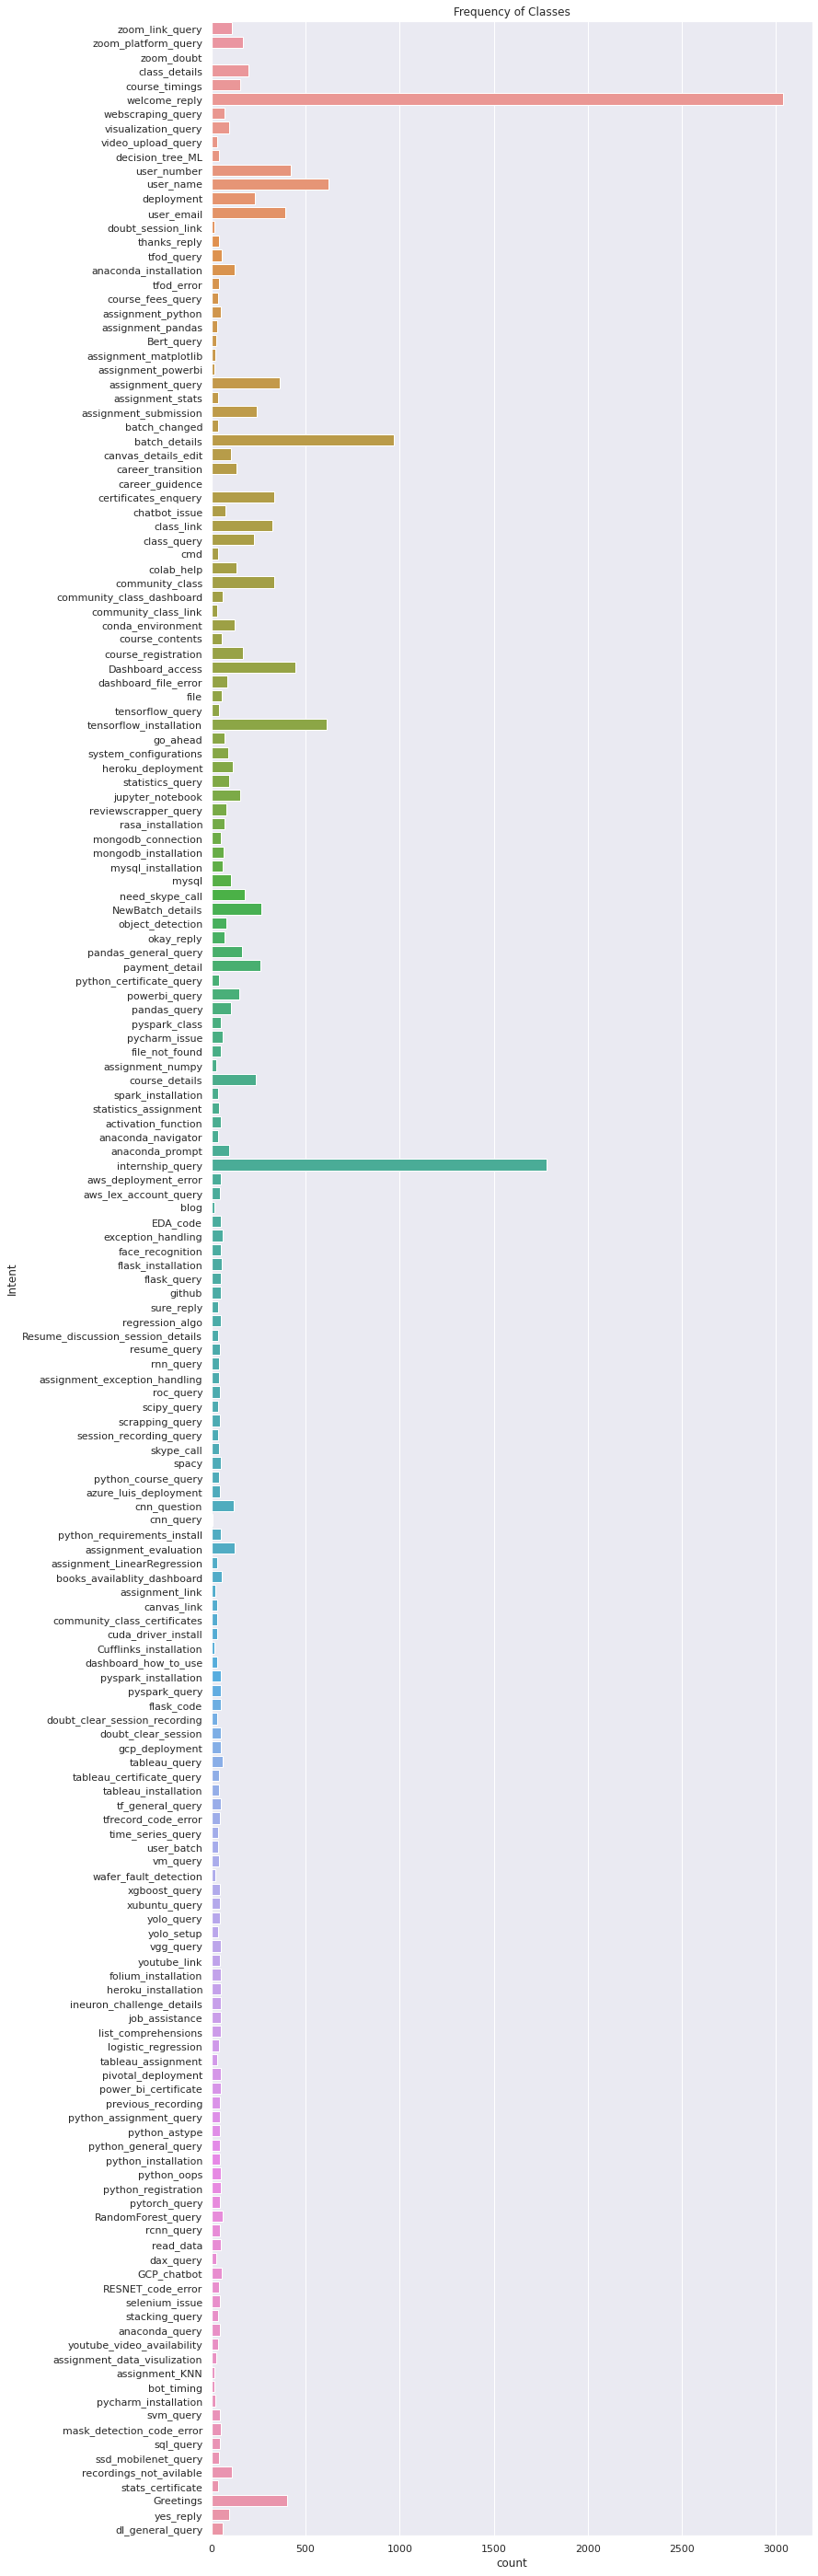

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,50.27)})
sns.countplot(y='Intent', data=dataset)  # number of queries in particular intent
plt.title("Frequency of Classes")
plt.show()